# DIT862 - Assignment 1 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import math

## Question 1

In [10]:
df = pd.read_csv('houses.csv', header = None)

In [11]:
# appending title/headers for the relevant columns in the csv file
# if you run it, it will append title/headers again and it will mess up the formatting 
col_names = ['1','Price','3','4','5','6','7','8','9','10','11','City','13','Area', '15', '16']

dff = df.to_csv('houses.csv', header=col_names, index=False)
dff

Run blocks below if you want

In [3]:
df= pd.read_csv('houses.csv', sep=',')

In [4]:
# Getting price column from csv file
df_prop = df['Price']

In [5]:
df_prop.head()

0     52000
1     57000
2     69500
3     84000
4    110000
Name: Price, dtype: int64

In [6]:
# mean, median, standard deviation, minimum, and maximum
mean = df_prop.mean()
median = df_prop.median()
std = df_prop.std()
mini = df_prop.min()
maxi = df_prop.max()

In [7]:
print('mean', mean)
print('median', median)
print('standard deviation', std)
print('min', mini)
print('max', maxi)

mean 174386.75374
median 129000.0
standard deviation 351463.39776390063
min 150
max 48465717


The values above is from the house data-set. Its different mathematical operation on the "Price" column

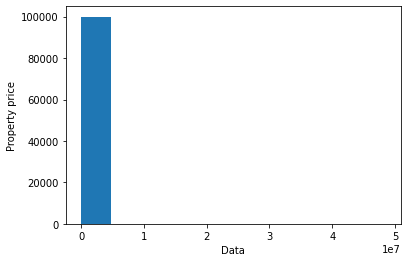

In [9]:
plt.hist(df_prop, density=False) 
plt.ylabel('Property price')
plt.xlabel('Data');

The histogram is so ugly because we are plotting 100000 prices vs nothing. There is nothing on the other axis. We could make it more informative by plotting prices vs things like area, city etc.

In this question about making it more informative, we interpret it as just how we can make it so as a question and not as a prompt to make more plots that are what we say as solutions.

In [10]:
df.columns

Index(['1', 'Price', '3', '4', '5', '6', '7', '8', '9', '10', '11', 'City',
       '13', 'Area', '15', '16'],
      dtype='object')

In [11]:
lon = df[df['City'] == 'LONDON']
# Getting the mean price in London
print(lon['Price'].mean())

352491.93941660435


The mean for houses in London are: 352491.93941660435

In [12]:
lo = df[df['City'] != 'LONDON']
# Getting the mean price NOT in London
print(lo['Price'].mean())

158853.04133597165


The mean for houses **NOT** in London are: 158853.04133597165

In [13]:
lo_np = np.array(lo['Price'])
lon_np = np.array(lon['Price'])

In [14]:
# We are checking for outliers in the data, with a threashhold of 3.5
def is_outlier(pp, thresh=3.5):
    if len(pp.shape) == 1:
        pp = pp[:,None]
    med = np.median(pp, axis=0)
    diff = np.sum((pp - med)**2, axis=-1)
    diff = np.sqrt(diff)
    mad = np.median(diff)

    mzs = 0.6745 * diff / mad

    return mzs > thresh

In [15]:
# removing the outliers to the data
t_lo = lo_np[~is_outlier(lo_np)]
t_lon = lon_np[~is_outlier(lon_np)]

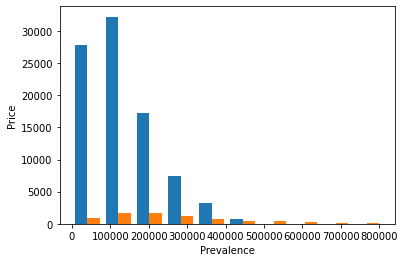

In [19]:
# plotting the filtered data to a histogram
gg = [t_lo, t_lon]
plt.hist(gg)
plt.ylabel('Price')
plt.xlabel('Prevalence');
plt.show()

**BLUE** = not London

**ORANGE** = London

- Mean for London: 352491.93941660435
- Mean **NOT** including London: 158853.04133597165

Real estate in London isn’t just more expensive but on average 2.2 times more expensive than cities outside of London. The graph doesn’t display the whole story as we’ve filtered out outliers from the plot to make it more illustrative. 

**NOTE** This data from column 12 in the house.csv

# Question 2

Importing the titanic data set

In [59]:
data_frame = pd.read_csv('titanic_train.csv', sep=',')
#data_frame 

### A)

In [24]:
# checking that it works
data_frame['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

Embarked is from which city they borded the titanic. This is ***nominal data***

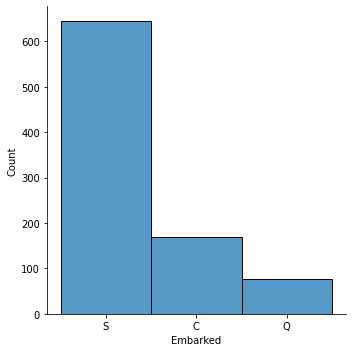

In [25]:
# plotting embarked as a histogram
sns.displot(data_frame, x="Embarked")

In [26]:
# checking that it works
data_frame['Pclass'].head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

PClass is there ticket class (first, second, third). This is ***ordinal data*** because unlike the previous question which was about where they boarded this defines the level of luxury etc. 

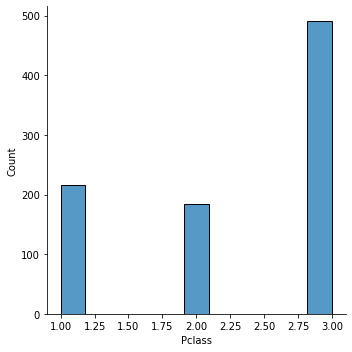

In [55]:
# plotting Pclass as a histogram
sns.displot(data_frame, x="Pclass")

In [56]:
# checking that it works
data_frame['Parch'].head()

0    0
1    0
2    0
3    0
4    0
Name: Parch, dtype: int64

Parch is the number of parents/childrens on board. This data is ***discrete data***

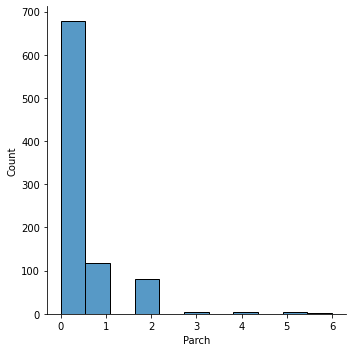

In [29]:
# plotting Parch as a histogram
sns.displot(data_frame, x="Parch")

In [30]:
# checking that it works
data_frame['Fare'].head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

This is ***numerical data***. Fare is the price

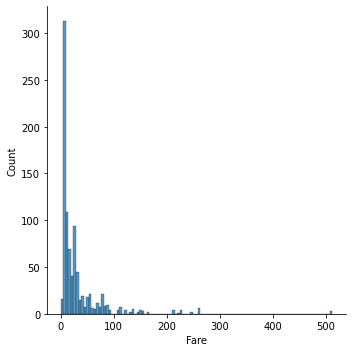

In [31]:
# plotting Fare as a histogram
sns.displot(data_frame, x="Fare")

### B)

For B and C: We compared our results with np.digitize and other numpy functions as suggested in the problem description but we've removed it from the notebook as it doesn't add anything now after. Scince we created our own methods.

In [53]:
aa = data_frame['Parch']
lp = list(aa)
for i in range(len(lp)):
    for j in range(i + 1, len(lp)):

        if lp[i] > lp[j]:
            lp[i], lp[j] = lp[j], lp[i]

#print(lp)

(array([678., 118.,   0.,  80.,   0.,   5.,   4.,   0.,   5.,   1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

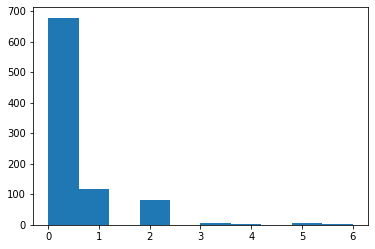

In [74]:
plt.hist(lp)

Our own version of quantize

In [21]:
def quantize(val, to_values):
    bm = None
    bmd = None
    for other_val in to_values:
        diff = abs(other_val - val)
        if bm is None or diff < bmd:
            bm = other_val
            bmd = diff
    return bm

In [130]:
f_test = quantize(69, data_frame['Fare'])
f_test

69.3

Our own splitIntoBins

In [36]:
def splitIntoBins(arr, n_bin, mini=None, maxi=None):
    mini = min(arr) if mini is None else mini 
    maxi = max(arr) if maxi is None else maxi 
    
    b_width = (maxi - mini) / n_bin 
    a_bins = [[] for _ in range(n_bin)] 

    for elem in arr:
        b_num = int((elem - mini) // b_width) 
        b_index = min(n_bin-1, b_num) 
        a_bins[b_index].append(elem) 
    return a_bins

In [37]:
obin = splitIntoBins(data_frame['Fare'], 20)
len(obin)
obin

[[7.25,
  7.925,
  8.05,
  8.4583,
  21.075,
  11.1333,
  16.7,
  8.05,
  7.8542,
  16.0,
  13.0,
  18.0,
  7.225,
  13.0,
  8.0292,
  21.075,
  7.225,
  7.8792,
  7.8958,
  7.75,
  10.5,
  7.2292,
  8.05,
  18.0,
  11.2417,
  9.475,
  21.0,
  7.8958,
  7.8792,
  8.05,
  15.5,
  7.75,
  21.6792,
  17.8,
  7.8,
  10.5,
  7.2292,
  7.2292,
  15.2458,
  10.5,
  8.1583,
  7.925,
  8.6625,
  10.5,
  14.4542,
  7.65,
  7.8958,
  8.05,
  12.475,
  9.0,
  9.5,
  7.7875,
  10.5,
  15.85,
  8.05,
  8.05,
  8.05,
  7.8542,
  20.575,
  7.25,
  8.05,
  23.0,
  7.8958,
  7.8958,
  8.6542,
  7.925,
  7.8958,
  7.65,
  7.775,
  7.8958,
  24.15,
  14.4542,
  8.05,
  9.825,
  14.4583,
  7.925,
  7.75,
  21.0,
  8.05,
  13.0,
  11.2417,
  7.75,
  7.1417,
  22.3583,
  6.975,
  7.8958,
  7.05,
  14.5,
  13.0,
  15.0458,
  9.2167,
  15.2458,
  7.75,
  15.85,
  6.75,
  11.5,
  7.7958,
  13.0,
  12.525,
  8.05,
  14.5,
  7.3125,
  7.7333,
  8.05,
  8.6625,
  16.1,
  15.75,
  7.775,
  8.6625,
  20.525,
  11.13

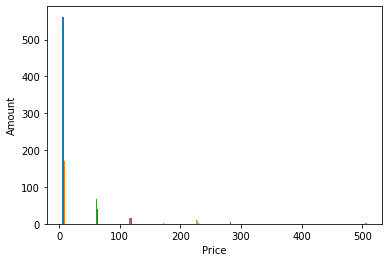

In [38]:
plt.hist(obin)
plt.ylabel('Amount')
plt.xlabel('Price');

We decided not to filter out outliers not regulate the size of the graph therefore it looks extremly scewed to the left however this was the most accurate representation of the data so we wanted to illustrative. 

### C)

In [40]:
a = data_frame['Fare']
l = list(a)
for i in range(len(l)):
    for j in range(i + 1, len(l)):

        if l[i] > l[j]:
           l[i], l[j] = l[j], l[i]

#print(l)

Getting the value for p = 0.2

In [43]:
p = 0.2
t1 = l[:int(len(l)*p)]
t1[-1]

7.8542

Getting the value for p = 0.5

In [45]:
p = 0.5
t2 = l[:int(len(l)*p)]
t2[-1]

14.4542

# Question 3

We did first decided to submit this assignment as a document, but we changed our minds and went with a jupyter notebook instead. The code were first written in python (not in a notebook), if the code-blocks looks a bit wonky it's because we imported it to jupyter.

Therefore our comments on the code and answer are in # format instead of markdown as previously for the notebook.

In [42]:
np.random.seed(70);

def partA():
    sampleSmall = [np.random.rand() for x in  range(1000)];
    sampleMedium = [np.random.rand() for x in range(10000)];
    sampleLarge = [np.random.rand() for x in  range(100000)];

    # What is the shape of this histogram and why?
    # It's flat befause random.rand is uniformly distributed.
    plt.hist(sampleSmall, density=True, bins=30);
    plt.show();

    plt.hist(sampleMedium, density=True, bins=30);
    plt.show();

    plt.hist(sampleLarge, density=True, bins=30);
    plt.show();
    
    # Investigate how the shape of the histogram is affected 
    # by the number of random numbers you have generated.
    # Bigger sample => flatter (less noise; law of large numbers).

    sampleSmall = [np.random.normal() for x in  range(1000)];
    sampleMedium = [np.random.normal() for x in range(10000)];
    sampleLarge = [np.random.normal() for x in  range(100000)];

    plt.hist(sampleSmall, density=True, bins=30);
    plt.show();

    plt.hist(sampleMedium, density=True, bins=30);
    plt.show();

    plt.hist(sampleLarge, density=True, bins=30);
    plt.show();


In [43]:
def partB():
    sample = [examScore(0.8, 20) for x in range(10000)]
    plt.hist(sample, density=True, bins = 40);
    plt.show();

In [44]:
def partC():
    sample = [numberOfAttempts(0.4) for x in range(10000)]
    plt.hist(sample, density=True, bins = 8);
    plt.show();

In [45]:
def success(pSuccess):
    return np.random.rand() < pSuccess;

In [47]:
def examScore(pCorrect, instances):
    score = 0;
    for i in range(instances):
        if success(pCorrect):
            score += 1;
    return score;     

In [48]:
def numberOfAttempts(pPass):
    attempts = 0;
    while not success(pPass):
        attempts += 1;

    return attempts;

### Part A

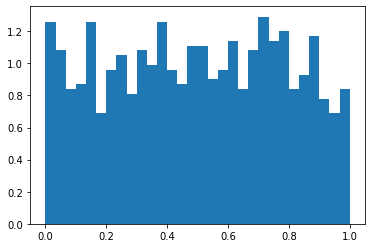

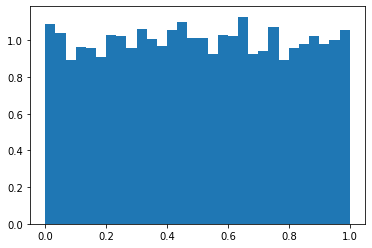

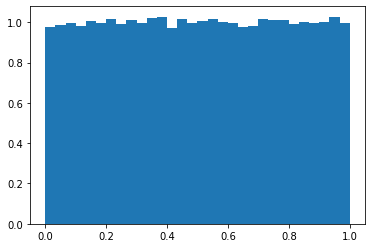

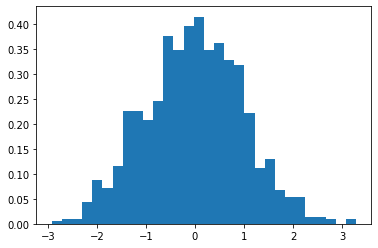

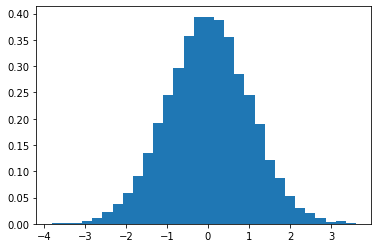

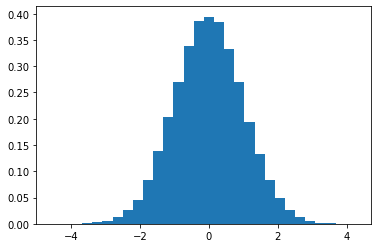

In [50]:
partA();

### Part B

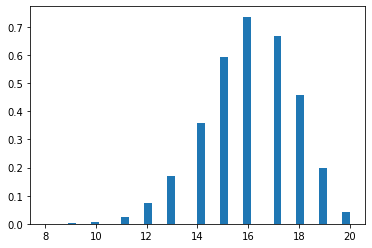

In [51]:
partB();

### Part C

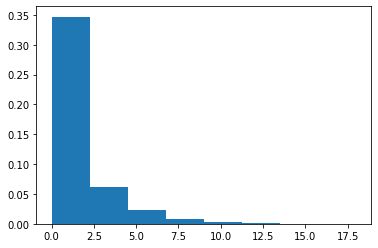

In [52]:
partC();